# Exploratory Data Analysis (EDA) - Retail Data

- Analyze numerical features (distributions, outliers).
    
- Analyze categorical features (value counts, unique categories).
    
- Identify and quantify missing values.
    
- Explore basic relationships (e.g., transactions over time, product categories).

## Data Loading & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define file paths
retail_path = "../data/raw/retail_data.csv"
marketing_path = "../data/raw/marketing_campaign.csv"
finance_path = "../data/raw/finance_risk.csv"

In [3]:
try:
    # Load retail_data.csv
    df_retail = pd.read_csv(retail_path)
    print(f"'{retail_path}' loaded successfully.")

    # Load marketing_campaign.csv
    df_marketing = pd.read_csv(marketing_path)
    print(f"'{marketing_path}' loaded successfully.")

    # Load finance_risk.csv
    df_finance = pd.read_csv(finance_path)
    print(f"'{finance_path}' loaded successfully.")

except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the CSV files are in the 'data/raw/' directory.")
    # Exit or handle gracefully if files are not found
    exit()

'../data/raw/retail_data.csv' loaded successfully.
'../data/raw/marketing_campaign.csv' loaded successfully.
'../data/raw/finance_risk.csv' loaded successfully.


### Information Retail Data

In [4]:
print("Initial Inspection: df_retail")
print("Shape:", df_retail.shape)
print("\nInfo:")
df_retail.info()

Initial Inspection: df_retail
Shape: (100000, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UserID              100000 non-null  int64  
 1   UserName            100000 non-null  object 
 2   Age                 100000 non-null  int64  
 3   Gender              100000 non-null  object 
 4   Country             100000 non-null  object 
 5   SignUpDate          100000 non-null  object 
 6   ProductID           100000 non-null  int64  
 7   ProductName         100000 non-null  object 
 8   Category            100000 non-null  object 
 9   Price               100000 non-null  float64
 10  PurchaseDate        100000 non-null  object 
 11  Quantity            100000 non-null  int64  
 12  TotalAmount         100000 non-null  float64
 13  HasDiscountApplied  100000 non-null  bool   
 14  DiscountRate        100000 n

In [5]:
df_retail.head()

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,...,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
0,1,User_1,39,Male,UK,2021-02-01,8190,Shoes,Books,532.37,...,1,532.37,False,0.02,5.1,Excellent,2024-05-03 04:04:27.591583,45.02,Mobile,Social Media
1,2,User_2,25,Female,Canada,2020-12-04,9527,T-shirt,Accessories,848.83,...,1,848.83,True,0.29,5.1,Excellent,2024-08-31 04:04:27.591606,13.83,Mobile,Social Media
2,3,User_3,43,Male,Canada,2022-07-08,3299,Headphones,Apparel,64.88,...,2,129.76,False,0.03,3.2,Good,2024-07-28 04:04:27.591611,59.09,Tablet,Organic Search
3,4,User_4,44,Male,Germany,2021-06-07,8795,T-shirt,Apparel,465.08,...,2,930.16,False,0.23,4.3,Good,2024-03-11 04:04:27.591615,55.42,Desktop,Email Marketing
4,5,User_5,23,Female,Canada,2021-11-06,1389,Shoes,Books,331.82,...,1,331.82,False,0.02,5.1,Average,2024-07-02 04:04:27.591619,14.99,Tablet,Email Marketing


In [6]:
print("Descriptive Statistics (Numerical):")
df_retail.describe()

Descriptive Statistics (Numerical):


,UserID,Age,ProductID,Price,Quantity,TotalAmount,DiscountRate,ReviewScore,SessionDuration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,43.460810,5508.117230,505.631966,2.495690,1260.852360,0.249831,4.006239,62.408836
std,28867.657797,14.980333,2606.544036,286.137505,1.120354,964.100243,0.144505,0.998750,33.177372
min,1.000000,18.000000,1000.000000,10.000000,1.000000,10.020000,0.000000,-0.600000,5.000000
25%,25000.750000,31.000000,3228.000000,257.137500,1.000000,494.677500,0.130000,3.300000,33.720000
50%,50000.500000,43.000000,5520.000000,505.950000,2.000000,966.080000,0.250000,4.000000,62.415000
75%,75000.250000,56.000000,7776.000000,753.732500,4.000000,1850.330000,0.370000,4.700000,91.040000
max,100000.000000,69.000000,9998.000000,999.980000,4.000000,3999.720000,0.500000,8.600000,120.000000


In [7]:
print("Descriptive Statistics (Categorical - Top 5):\n")
# Select object or categorical columns and show value counts for top 5
for col in df_retail.select_dtypes(include=["object", "category"]).columns:
    print(f"-- {col} --")
    display(df_retail[col].value_counts().head())

Descriptive Statistics (Categorical - Top 5):

-- UserName --


UserName
User_1        1
User_66651    1
User_66673    1
User_66672    1
User_66671    1
Name: count, dtype: int64

-- Gender --


Gender
Non-Binary    33538
Male          33269
Female        33193
Name: count, dtype: int64

-- Country --


Country
USA          16844
Canada       16767
UK           16699
Germany      16582
Australia    16570
Name: count, dtype: int64

-- SignUpDate --


SignUpDate
2022-01-17    125
2022-11-20    122
2021-07-14    119
2020-11-22    117
2022-08-06    117
Name: count, dtype: int64

-- ProductName --


ProductName
T-shirt       14401
Headphones    14396
Book          14360
Watch         14287
Shoes         14261
Name: count, dtype: int64

-- Category --


Category
Apparel        25201
Accessories    25015
Electronics    24936
Books          24848
Name: count, dtype: int64

-- PurchaseDate --


PurchaseDate
2021-07-16    316
2021-07-05    314
2021-07-29    313
2021-03-22    313
2021-08-18    313
Name: count, dtype: int64

-- ReviewText --


ReviewText
Excellent    25035
Good         25029
Poor         24978
Average      24958
Name: count, dtype: int64

-- LastLogin --


LastLogin
2024-05-03 04:04:27.591583    1
2024-03-14 04:04:27.868778    1
2024-10-06 04:04:27.868870    1
2023-11-20 04:04:27.868865    1
2024-07-29 04:04:27.868862    1
Name: count, dtype: int64

-- DeviceType --


DeviceType
Mobile     33568
Tablet     33456
Desktop    32976
Name: count, dtype: int64

-- ReferralSource --


ReferralSource
Email Marketing    25154
Ad Campaign        25087
Organic Search     25021
Social Media       24738
Name: count, dtype: int64

### Information Marketing Data

In [8]:
print("Initial Inspection: df_marketing")
print("Shape:", df_marketing.shape)
print("\nInfo:")
df_marketing.info()

Initial Inspection: df_marketing
Shape: (50000, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    50000 non-null  object 
 1   start_date       50000 non-null  object 
 2   end_date         50000 non-null  object 
 3   budget           50000 non-null  float64
 4   roi              50000 non-null  float64
 5   type             50000 non-null  object 
 6   target_audience  50000 non-null  object 
 7   channel          50000 non-null  object 
 8   conversion_rate  50000 non-null  float64
 9   revenue          50000 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.8+ MB


In [9]:
print("First 5 Rows:")
df_marketing.head()

First 5 Rows:


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Expanded zero tolerance adapter,2022-09-19,2024-05-07,80474.62,0.86,email,B2C,organic,0.70,394021.52
1,Managed even-keeled Internet solution,2023-03-09,2024-01-12,81342.10,0.66,email,B2C,promotion,0.91,362030.20
2,Switchable leadingedge alliance,2023-01-29,2024-07-28,93236.34,0.92,webinar,B2C,referral,0.85,545988.99
3,Object-based composite info-mediaries,2023-05-04,2023-12-19,52277.41,0.79,webinar,B2C,promotion,0.84,838402.57
4,Persistent disintermediate artificial intellig...,2023-01-23,2023-08-21,10659.15,0.70,email,B2B,promotion,0.84,506589.58


In [10]:
print("Descriptive Statistics (Numerical):")
df_marketing.describe()

Descriptive Statistics (Numerical):


,budget,roi,conversion_rate,revenue
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,49731.462075,0.534840,0.543914,518279.874870
std,28912.146372,0.261888,0.266943,285365.133092
min,1052.570000,0.000000,0.000000,108.210000
25%,24959.240000,0.310000,0.300000,273231.880000
50%,47906.320000,0.530000,0.550000,526682.950000
75%,75262.370000,0.760000,0.770000,770745.630000
max,99957.150000,0.990000,0.990000,999712.490000


In [11]:
print("\nDescriptive Statistics (Categorical - Top 5):")
for col in df_marketing.select_dtypes(include=["object", "category"]).columns:
    print(f"{col}")
    display(df_marketing[col].value_counts().head())


Descriptive Statistics (Categorical - Top 5):
campaign_name


campaign_name
Reverse-engineered static infrastructure    100
Expanded 3rdgeneration synergy               73
Visionary 24hour circuit                     70
Realigned zero administration intranet       70
Stand-alone modular Internet solution        70
Name: count, dtype: int64

start_date


start_date
2023-07-22    415
2022-09-20    382
2023-07-02    381
2023-07-07    363
2023-04-25    357
Name: count, dtype: int64

end_date


end_date
2023-10-09    465
2024-04-16    411
2024-03-22    353
2023-10-06    350
2024-06-06    350
Name: count, dtype: int64

type


type
email           13894
webinar         13097
social media    11505
podcast         11504
Name: count, dtype: int64

target_audience


target_audience
B2B    25610
B2C    24390
Name: count, dtype: int64

channel


channel
promotion    13609
referral     12505
organic      11976
paid         11910
Name: count, dtype: int64

### Information Finance Data

In [12]:
print("Initial Inspection: df_finance")
print("Shape:", df_finance.shape)
print("\nInfo:")
df_finance.info()

Initial Inspection: df_finance
Shape: (1225, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 1 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD  1225 non-null   object
dtypes: object(1)
memory usage: 9.7+ KB


In [13]:
print("First 5 Rows:")
df_finance.head()

First 5 Rows:


,YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD
0,19.0;4.0;.0;1;.00;R;.00;O;14464.00;4.00;.00;.0...
1,41.0;2.0;.0;1;.00;P;36000.00;O;.00;.00;280.00;...
2,66.0;.0;.0;1;.00;N;30000.00;N;.00;.00;.00;.00;...
3,51.0;2.0;.0;1;.00;P;464.00;O;24928.00;8464.00;...
4,65.0;.0;.0;1;.00;P;15000.00;P;.00;.00;.00;.00;...


In [14]:
print("Descriptive Statistics (Numerical):")
df_finance.describe()

Descriptive Statistics (Numerical):


,YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD
count,1225
unique,1202
top,69.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;....
freq,7


In [15]:
print("Descriptive Statistics (Categorical - Top 5):")
for col in df_finance.select_dtypes(include=["object", "category"]).columns:
    print(f"{col} \n")
    display(df_finance[col].value_counts().head())

print("Initial Inspection Complete")

Descriptive Statistics (Categorical - Top 5):
YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD 



YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD
69.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;.00;.00     7
67.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;.00;.00     5
69.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;.00;1.00    5
64.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;.00;.00     3
68.0;.0;.0;1;.00;T;.00;P;.00;.00;.00;.00;.00;.00;.00     3
Name: count, dtype: int64

Initial Inspection Complete


## Exploratory Data Analysis (EDA)

### Data Overview & Missing Values

In [16]:
print("Missing Values Count (Absolute):")
print(df_retail.isnull().sum())

Missing Values Count (Absolute):
UserID                0
UserName              0
Age                   0
Gender                0
Country               0
SignUpDate            0
ProductID             0
ProductName           0
Category              0
Price                 0
PurchaseDate          0
Quantity              0
TotalAmount           0
HasDiscountApplied    0
DiscountRate          0
ReviewScore           0
ReviewText            0
LastLogin             0
SessionDuration       0
DeviceType            0
ReferralSource        0
dtype: int64


In [17]:
print("Missing Values Percentage:")
print((df_retail.isnull().sum() / len(df_retail)) * 100)

Missing Values Percentage:
UserID                0.0
UserName              0.0
Age                   0.0
Gender                0.0
Country               0.0
SignUpDate            0.0
ProductID             0.0
ProductName           0.0
Category              0.0
Price                 0.0
PurchaseDate          0.0
Quantity              0.0
TotalAmount           0.0
HasDiscountApplied    0.0
DiscountRate          0.0
ReviewScore           0.0
ReviewText            0.0
LastLogin             0.0
SessionDuration       0.0
DeviceType            0.0
ReferralSource        0.0
dtype: float64


Insight:

No missing value found in retail data

### Analysis Of Numerical Columns

In [18]:
numerical_cols = df_retail.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")

print("\nDescriptive Statistics for Numerical Features:")
display(df_retail[numerical_cols].describe().T)

Numerical Columns (9): ['UserID', 'Age', 'ProductID', 'Price', 'Quantity', 'TotalAmount', 'DiscountRate', 'ReviewScore', 'SessionDuration']

Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
UserID,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.500,75000.2500,100000.00
Age,100000.0,43.460810,14.980333,18.00,31.0000,43.000,56.0000,69.00
ProductID,100000.0,5508.117230,2606.544036,1000.00,3228.0000,5520.000,7776.0000,9998.00
Price,100000.0,505.631966,286.137505,10.00,257.1375,505.950,753.7325,999.98
Quantity,100000.0,2.495690,1.120354,1.00,1.0000,2.000,4.0000,4.00
TotalAmount,100000.0,1260.852360,964.100243,10.02,494.6775,966.080,1850.3300,3999.72
DiscountRate,100000.0,0.249831,0.144505,0.00,0.1300,0.250,0.3700,0.50
ReviewScore,100000.0,4.006239,0.998750,-0.60,3.3000,4.000,4.7000,8.60
SessionDuration,100000.0,62.408836,33.177372,5.00,33.7200,62.415,91.0400,120.00


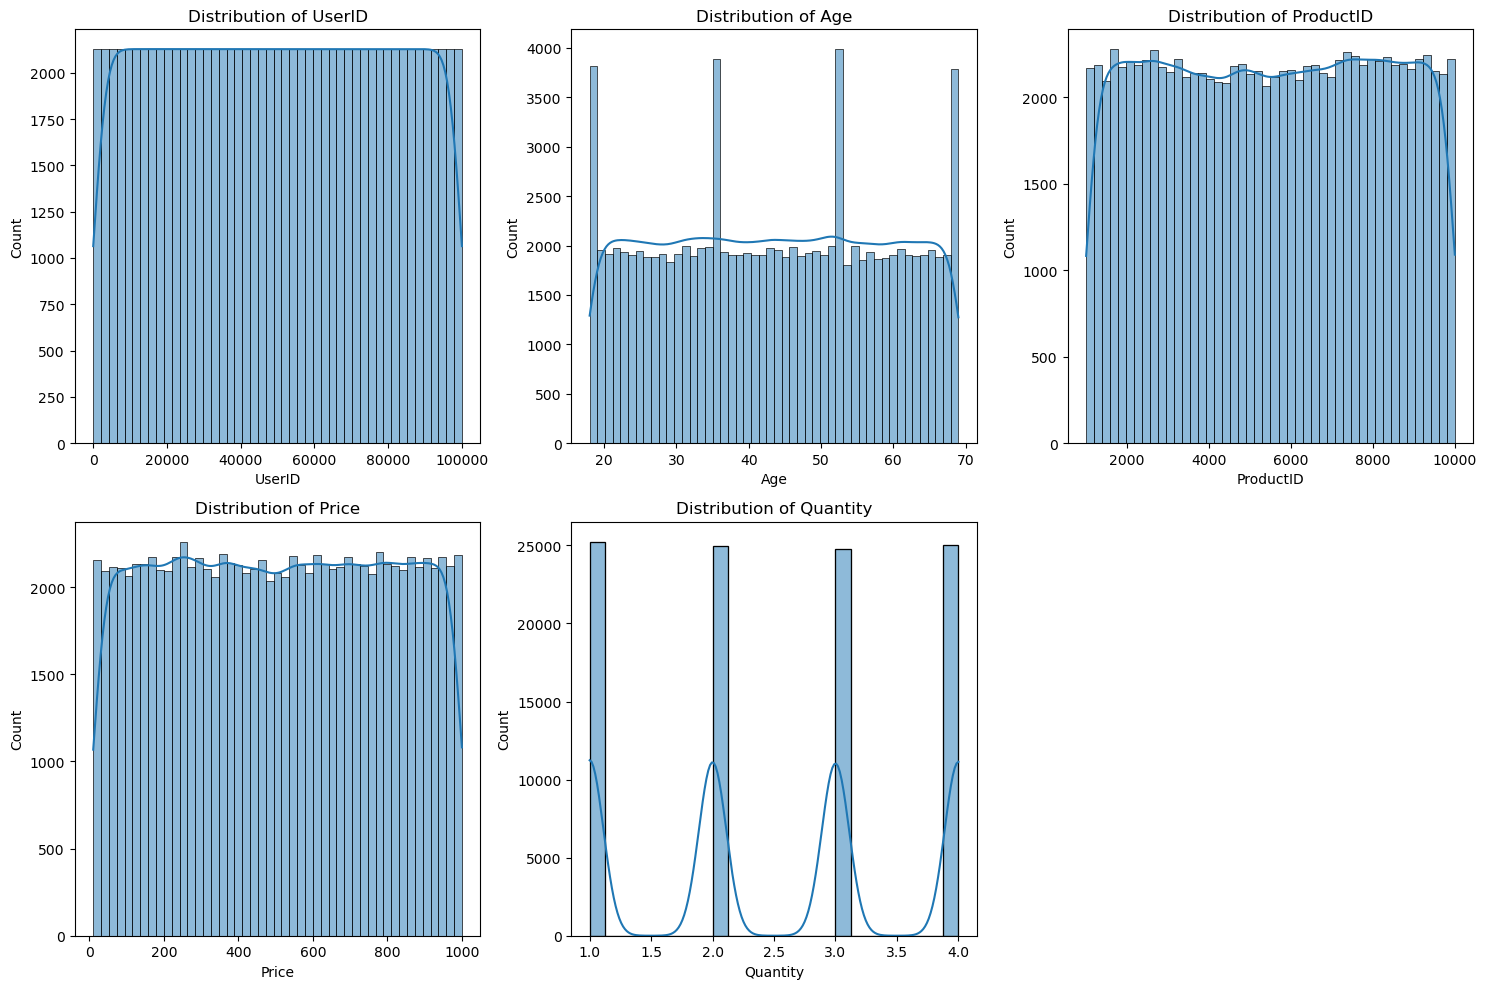

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:5]):  # Adjust slice as needed
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_retail[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

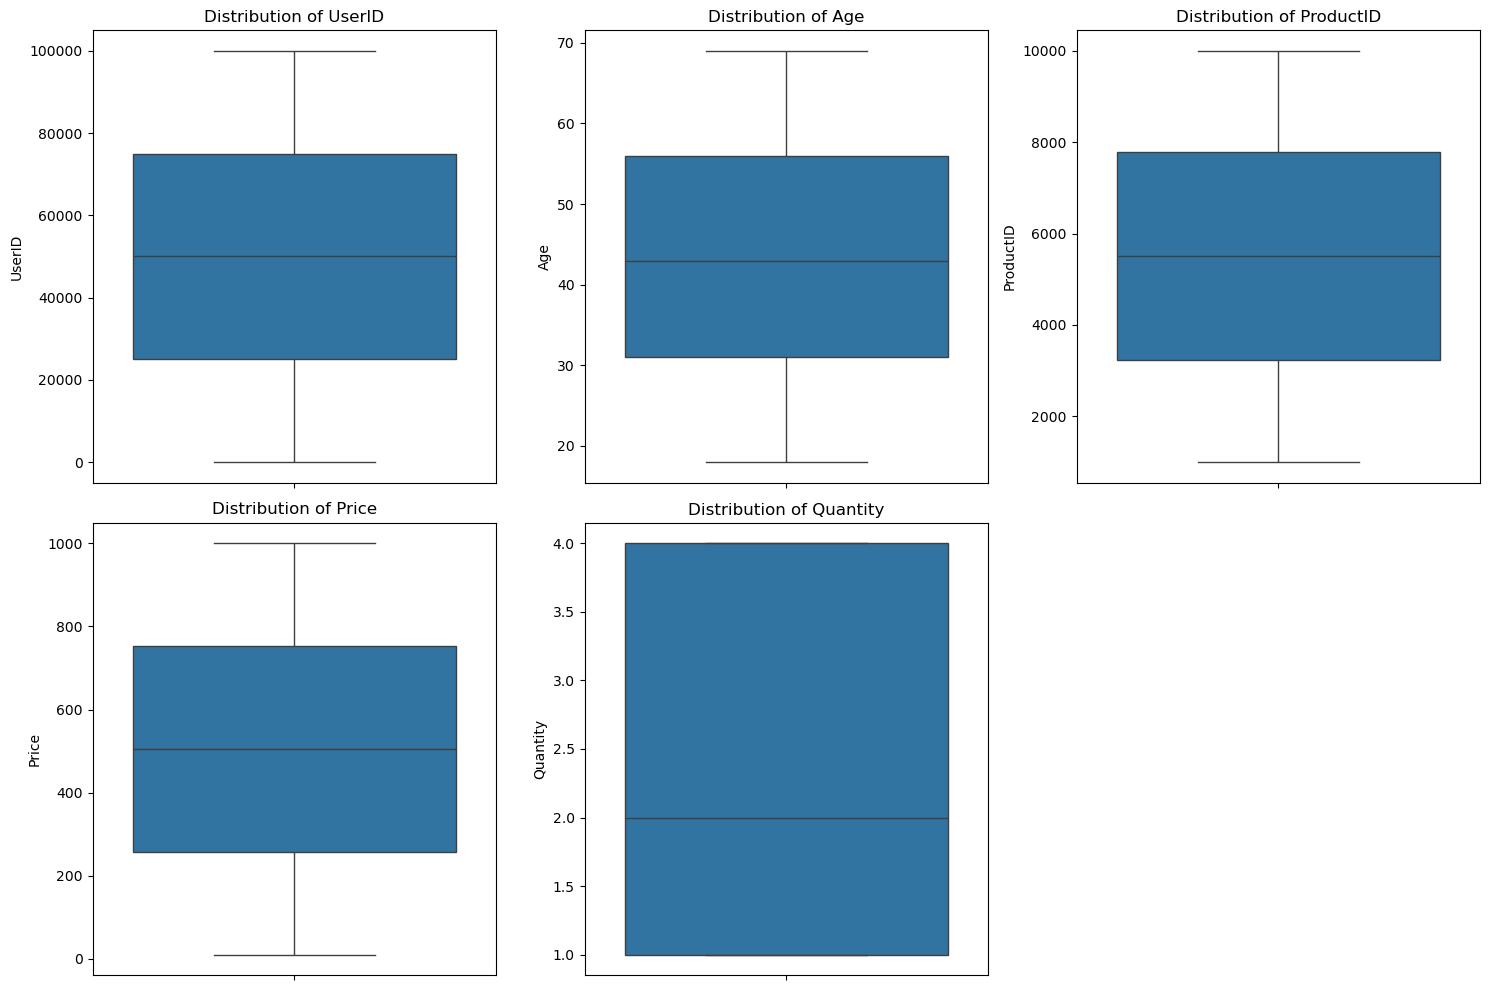

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:5]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df_retail[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Analysis of Categorical Features

In [21]:
categorical_cols = df_retail.select_dtypes(include="object").columns.tolist()
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

Categorical Columns (11): ['UserName', 'Gender', 'Country', 'SignUpDate', 'ProductName', 'Category', 'PurchaseDate', 'ReviewText', 'LastLogin', 'DeviceType', 'ReferralSource']


In [22]:
print("\nUnique Values and Value Counts for Categorical Features:")
for col in categorical_cols:
    print(f"Feature: {col} ({df_retail[col].nunique()} unique values)")
    print(df_retail[col].value_counts(dropna=False))


Unique Values and Value Counts for Categorical Features:
Feature: UserName (100000 unique values)
UserName
User_1         1
User_66651     1
User_66673     1
User_66672     1
User_66671     1
              ..
User_33332     1
User_33331     1
User_33330     1
User_33329     1
User_100000    1
Name: count, Length: 100000, dtype: int64
Feature: Gender (3 unique values)
Gender
Non-Binary    33538
Male          33269
Female        33193
Name: count, dtype: int64
Feature: Country (6 unique values)
Country
USA          16844
Canada       16767
UK           16699
Germany      16582
Australia    16570
India        16538
Name: count, dtype: int64
Feature: SignUpDate (1096 unique values)
SignUpDate
2022-01-17    125
2022-11-20    122
2021-07-14    119
2020-11-22    117
2022-08-06    117
             ... 
2021-08-30     66
2020-11-23     65
2022-04-05     64
2022-01-10     62
2022-04-27     62
Name: count, Length: 1096, dtype: int64
Feature: ProductName (7 unique values)
ProductName
T-shirt     

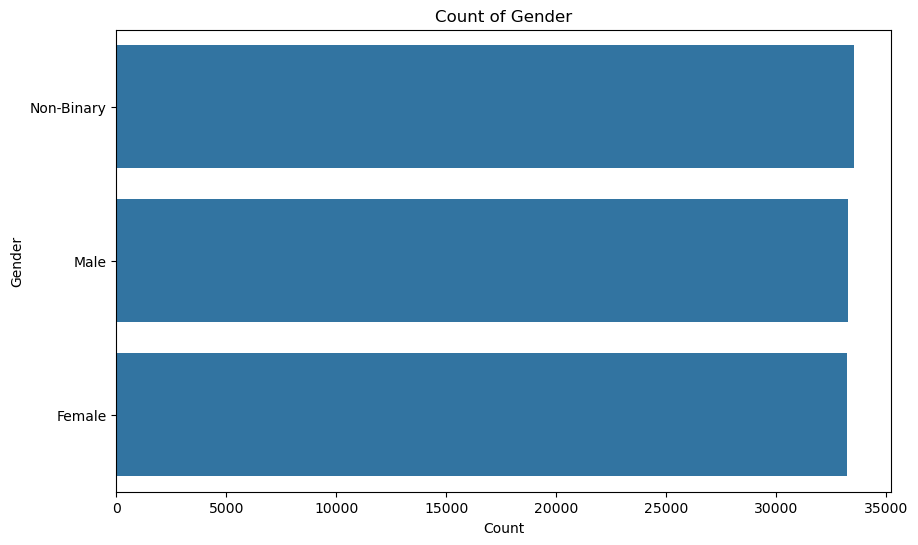

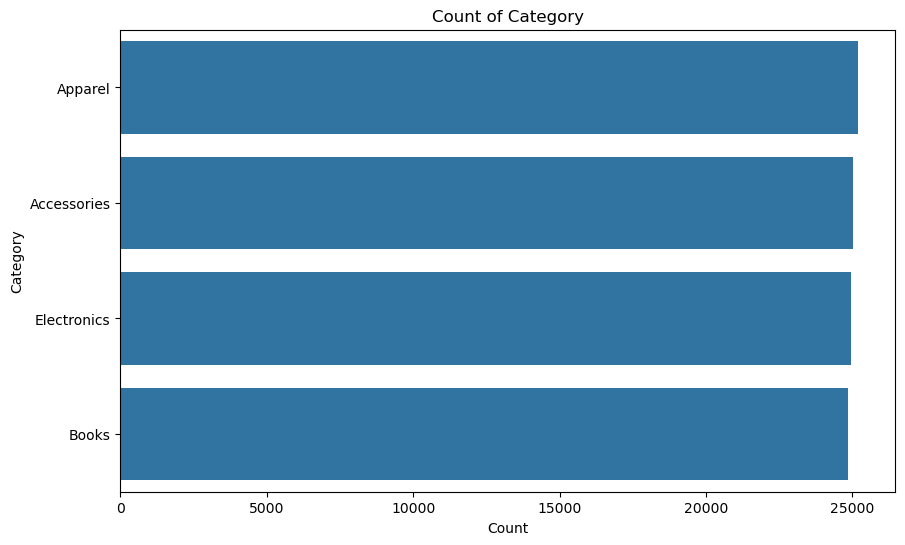

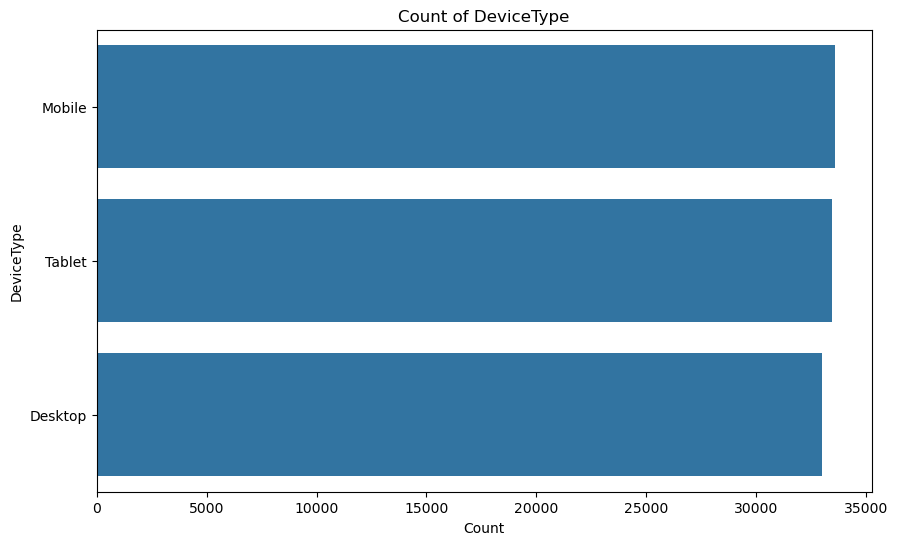

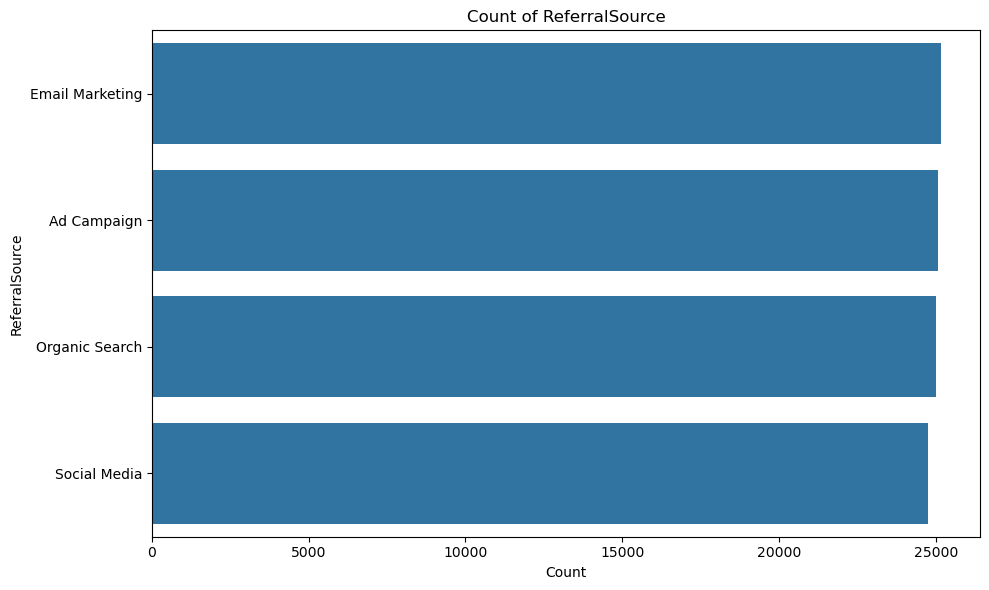

In [29]:
for col in [
    "Gender",
    "Category",
    "DeviceType",
    "ReferralSource",
]:
    if col in categorical_cols:
        plt.figure(figsize=(10, 6))
        # Calculate value counts and convert to DataFrame for barplot
        plot_data = df_retail[col].value_counts().reset_index()
        plot_data.columns = [col, "Count"]  # Rename columns for clarity
        # plt.subplot(1, 3)
        sns.barplot(x="Count", y=col, data=plot_data)
        plt.title(f"Count of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
    else:
        print(f"Column '{col}' not found or not categorical. Skipping bar plot.")
plt.tight_layout()
plt.show()

### Correlation Analysis (Numerical Features)

Correlation Matrix:


,UserID,Age,ProductID,Price,Quantity,TotalAmount,DiscountRate,ReviewScore,SessionDuration
UserID,1.000000,0.002816,0.001610,0.001635,0.003272,0.002386,-0.000300,0.001900,-0.003079
Age,0.002816,1.000000,0.008236,-0.000558,-0.000224,-0.001723,-0.002570,-0.000128,0.006161
ProductID,0.001610,0.008236,1.000000,0.002417,0.003485,0.004602,0.003866,0.003568,-0.001775
Price,0.001635,-0.000558,0.002417,1.000000,-0.003270,0.738465,-0.002465,-0.002683,-0.003245
Quantity,0.003272,-0.000224,0.003485,-0.003270,1.000000,0.584123,0.002368,-0.001334,0.001459
TotalAmount,0.002386,-0.001723,0.004602,0.738465,0.584123,1.000000,-0.000827,-0.003497,-0.000151
DiscountRate,-0.000300,-0.002570,0.003866,-0.002465,0.002368,-0.000827,1.000000,0.004405,0.004564
ReviewScore,0.001900,-0.000128,0.003568,-0.002683,-0.001334,-0.003497,0.004405,1.000000,-0.001985
SessionDuration,-0.003079,0.006161,-0.001775,-0.003245,0.001459,-0.000151,0.004564,-0.001985,1.000000


Visualizing Correlation Matrix:


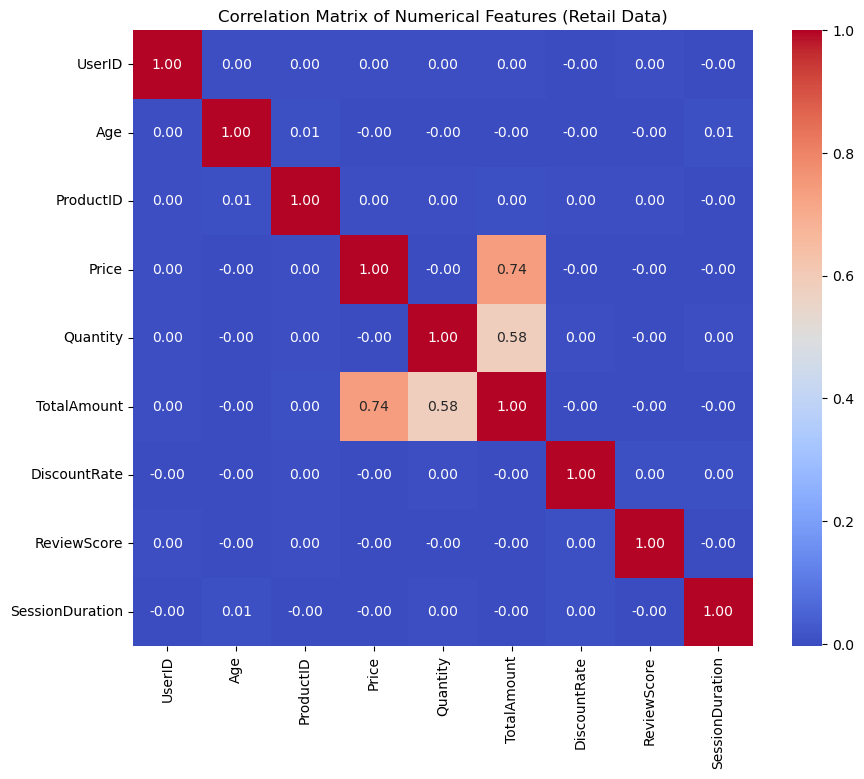

In [ ]:
if len(numerical_cols) > 1:
    correlation_matrix = df_retail[numerical_cols].corr()
    print("Correlation Matrix:")
    display(correlation_matrix)

    print("Visualizing Correlation Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix of Numerical Features (Retail Data)")
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

### Time-Series Components

In [32]:
date_cols = [
    col
    for col in df_retail.columns
    if "date" in col.lower() or "timestamp" in col.lower()
]

In [36]:
# Convert relevant columns to datetime
# Note: Error handling for parsing will be more robust in Task 1.6
df_retail["PurchaseDate"] = pd.to_datetime(df_retail["PurchaseDate"], errors="coerce")
df_retail["SignUpDate"] = pd.to_datetime(df_retail["SignUpDate"], errors="coerce")
df_retail["LastLogin"] = pd.to_datetime(df_retail["LastLogin"], errors="coerce")

In [40]:
print("Date/Time Columns converted to datetime type\n")
print(df_retail[["PurchaseDate", "SignUpDate", "LastLogin"]].info())

Date/Time Columns converted to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PurchaseDate  100000 non-null  datetime64[ns]
 1   SignUpDate    100000 non-null  datetime64[ns]
 2   LastLogin     100000 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.3 MB
None


In [45]:
# Aggregate total amount by purchase date
daily_sales = (
    df_retail.groupby(df_retail["PurchaseDate"].dt.date)["TotalAmount"]
    .sum()
    .reset_index()
)
daily_sales["PurchaseDate"] = pd.to_datetime(daily_sales["PurchaseDate"])
daily_sales.set_index("PurchaseDate", inplace=True)

# Resample to weekly and monthly for clearer trends
weekly_sales = daily_sales["TotalAmount"].resample("W").sum()
monthly_sales = daily_sales["TotalAmount"].resample("ME").sum()

In [48]:
print("Daily Sales Head:")
display(daily_sales.head())
print("Weekly Sales Head:")
display(weekly_sales.head())
print("Monthly Sales Head:")
display(monthly_sales.head())

Daily Sales Head:


,TotalAmount
PurchaseDate,
2021-01-01,339315.43
2021-01-02,360526.29
2021-01-03,344865.30
2021-01-04,416953.49
2021-01-05,331841.91


Weekly Sales Head:


PurchaseDate
2021-01-03    1044707.02
2021-01-10    2386751.89
2021-01-17    2417906.07
2021-01-24    2382827.60
2021-01-31    2600856.29
Freq: W-SUN, Name: TotalAmount, dtype: float64

Monthly Sales Head:


PurchaseDate
2021-01-31    10833048.87
2021-02-28     9586040.96
2021-03-31    10797449.91
2021-04-30    10246559.39
2021-05-31    10617058.80
Freq: ME, Name: TotalAmount, dtype: float64

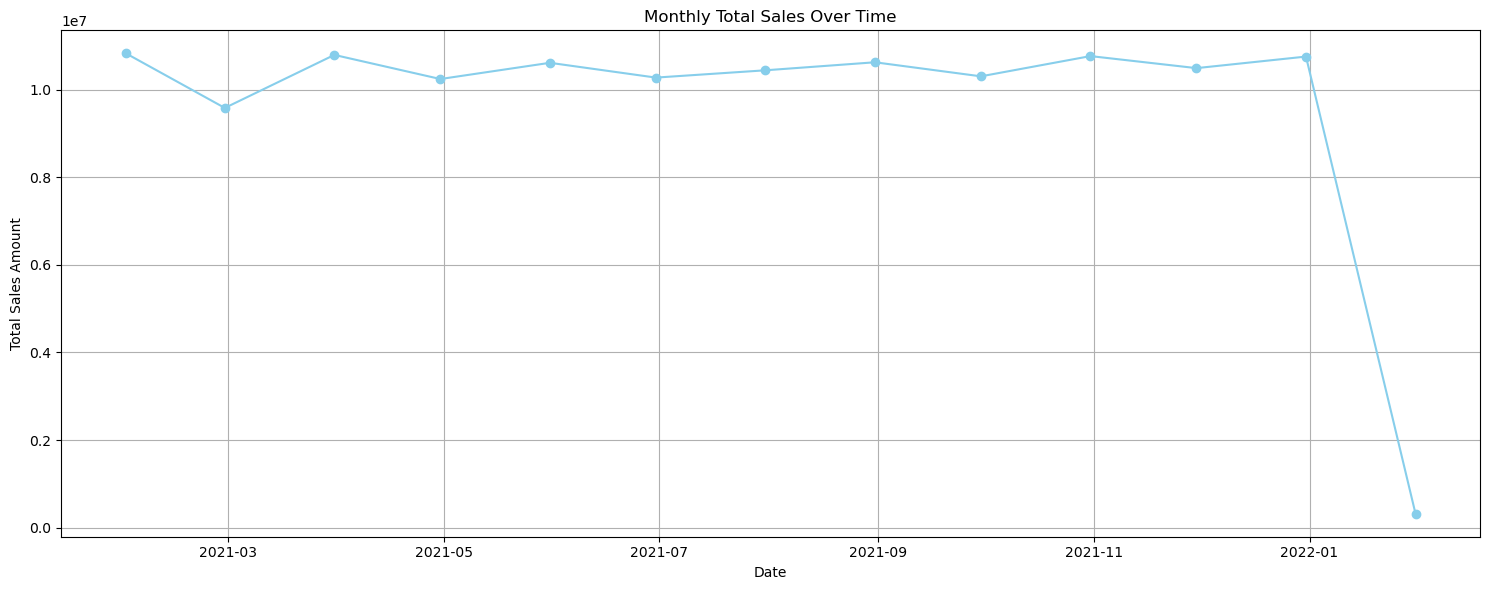

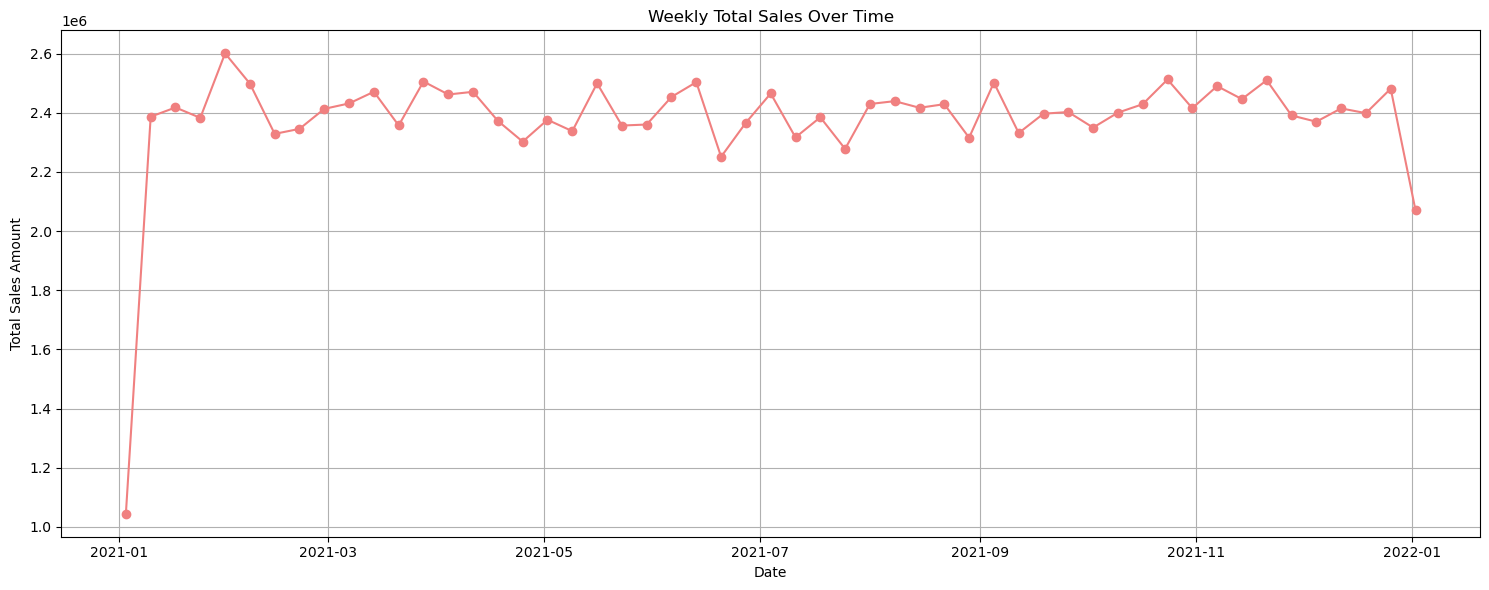

In [ ]:
# Visualizing Sales Trends
plt.figure(figsize=(15, 6))
plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker="o",
    linestyle="-",
    color="skyblue",
)
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(
    weekly_sales.index,
    weekly_sales.values,
    marker="o",
    linestyle="-",
    color="lightcoral",
)
plt.title("Weekly Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Daily/Monthly Active Users (based on LastLogin)

# Daily Active Users (DAU)
# Count unique users per day based on LastLogin
dau = (
    df_retail.groupby(df_retail["LastLogin"].dt.date)["UserID"].nunique().reset_index()
)
dau.columns = ["Date", "ActiveUsers"]
dau["Date"] = pd.to_datetime(dau["Date"])
dau.set_index("Date", inplace=True)

# Monthly Active Users (MAU)
# For MAU, it's unique users logging in within each month period.
# Extract year and month, then count unique users
df_retail["LastLogin_Month"] = df_retail["LastLogin"].dt.to_period("M")
mau = df_retail.groupby("LastLogin_Month")["UserID"].nunique().reset_index()
mau.columns = ["Month", "ActiveUsers"]
mau["Month"] = mau[
    "Month"
].dt.to_timestamp()  # Convert Period to Timestamp for plotting
mau.set_index("Month", inplace=True)

In [ ]:
print("Daily Active Users Head:")
display(dau.head())
print("Monthly Active Users Head:")
display(mau.head())

Daily Active Users Head:


,ActiveUsers
Date,
2023-11-10,270
2023-11-11,270
2023-11-12,260
2023-11-13,274
2023-11-14,261


Monthly Active Users Head:


,ActiveUsers
Month,
2023-11-01,5561
2023-12-01,8427
2024-01-01,8541
2024-02-01,7930
2024-03-01,8530


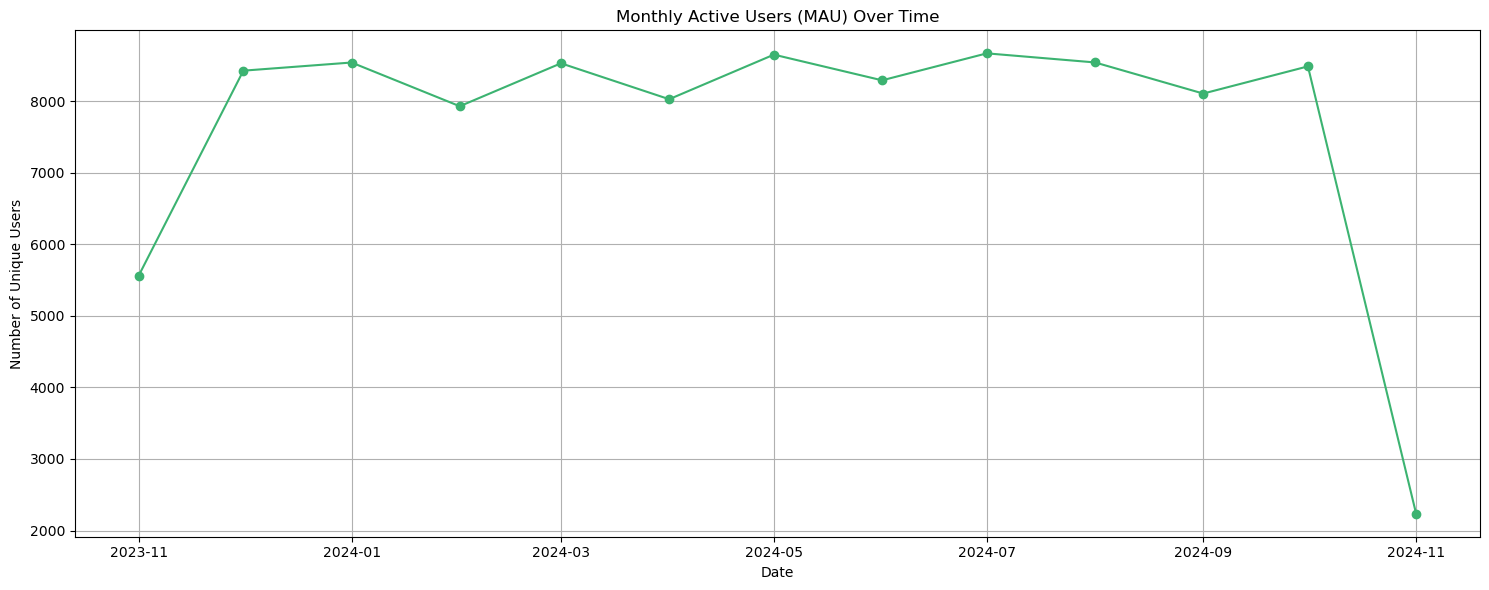

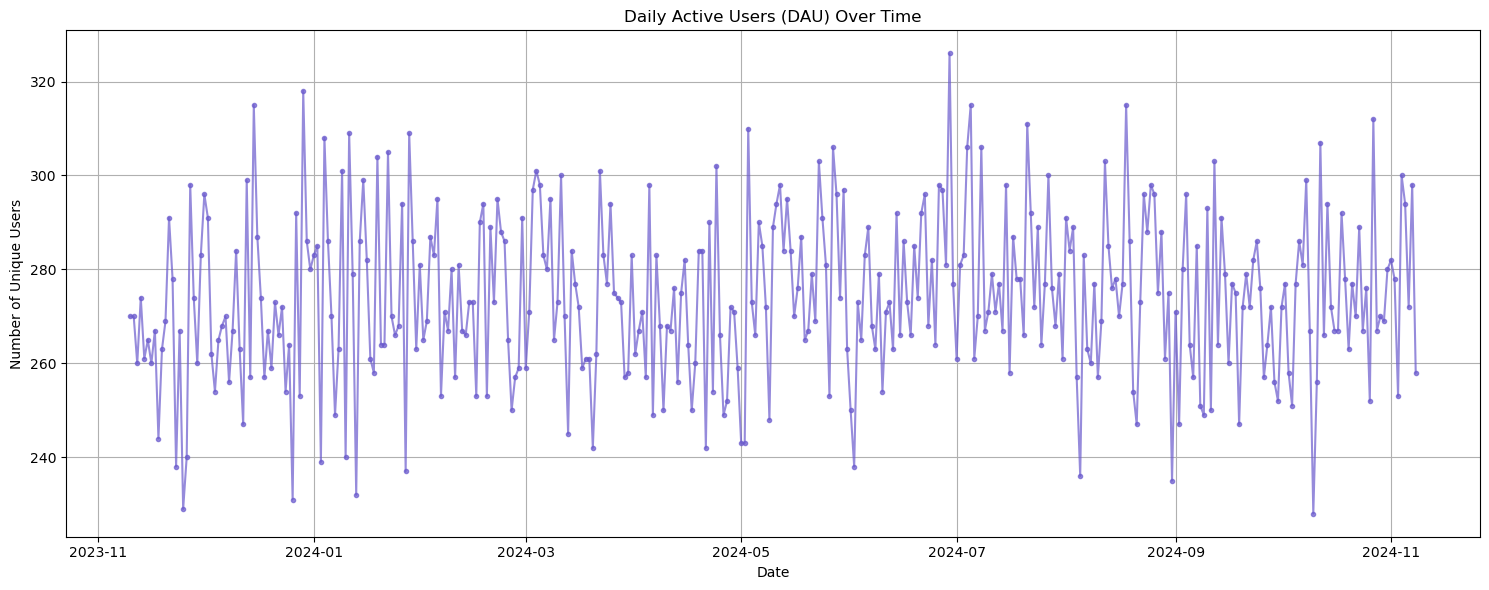

In [ ]:
# Visualizing Active Users Trends
plt.figure(figsize=(15, 6))
plt.plot(mau.index, mau.values, marker="o", linestyle="-", color="mediumseagreen")
plt.title("Monthly Active Users (MAU) Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Unique Users")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(dau.index, dau.values, marker=".", linestyle="-", color="slateblue", alpha=0.7)
plt.title("Daily Active Users (DAU) Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Unique Users")
plt.grid(True)
plt.tight_layout()
plt.show()